In [1]:
import pandas as pd
import requests
from io import BytesIO
import numpy as np

In [2]:
# 2013년 시가총액
url = "https://docs.google.com/spreadsheet/ccc?" + "key=0Auils-M1uCmvdGFSZFVual9aYVp1UE9oWnZocE5aQVE" + "&output=csv"

url = "http://goo.gl/WfQnX0" # csv 로 다운로드

r = requests.get(url) 
data = r.content

In [3]:
df = pd.read_csv(BytesIO(data), dtype={'code':np.str}) 
df.head()

,Unnamed: 0,rank,code,name,marcap,marcap_pct,year,sector
0,0,1,005930,삼성전자,202.095,15.47%,2013,반도체와반도체장비
1,1,2,005380,현대차,52.095,3.99%,2013,자동차
2,2,3,012330,현대모비스,28.570,2.19%,2013,자동차부품
3,3,4,005490,POSCO,28.467,2.18%,2013,철강
4,4,5,000660,SK하이닉스,26.135,2.00%,2013,반도체와반도체장비


In [4]:
df2 = df[['code', 'name', 'marcap', 'sector']] 
df2.head(10)

,code,name,marcap,sector
0,005930,삼성전자,202.095,반도체와반도체장비
1,005380,현대차,52.095,자동차
2,012330,현대모비스,28.570,자동차부품
3,005490,POSCO,28.467,철강
4,000660,SK하이닉스,26.135,반도체와반도체장비
5,035420,NAVER,23.865,인터넷소프트웨어와서비스
6,005935,삼성전자우,23.130,반도체와반도체장비
7,000270,기아차,22.741,자동차
8,055550,신한지주,22.430,은행
9,015760,한국전력,22.308,전기유틸리티


In [5]:
sector_counts = df2['sector'].value_counts()

print (sector_counts.count()) # 업종수: 80
print (sector_counts.index) # 업종항목: 자동차부품, 화학, 기계, 제약 등 ... 
print (sector_counts.values) # 업종내 기업수: 120, 109, 98, 95 ...

80
Index(['자동차부품', '화학', '기계', '제약', '반도체와반도체장비', '디스플레이장비및부품', '건설', '전자장비와기기',
       '식품', '섬유,의류,신발,호화품', '핸드셋', '철강', '통신장비', '건축자재', '증권', '방송과엔터테인먼트',
       'IT서비스', '비철금속', '소프트웨어', '조선', '전기제품', '건강관리장비와용품', '포장재', '종이와목재',
       '석유와가스', '게임소프트웨어와서비스', '전기장비', '도로와철도운송', '전자제품', '상업서비스와공급품',
       '인터넷소프트웨어와서비스', '컴퓨터와주변기기', '건축제품', '호텔,레스토랑,레저', '생물공학', '화장품',
       '교육서비스', '음료', '손해보험', '가스유틸리티', '가정용기기와용품', '백화점과일반상점', '생명과학도구및서비스',
       '가구', '기타금융', '은행', '인터넷과카탈로그소매', '자동차', '무역회사와판매업체', '해운사', '창업투자',
       '레저용장비와제품', '다각화된통신서비스', '복합기업', '전문소매', '신용평가서비스', '가정용품', '에너지장비및서비스',
       '광고', '판매업체', '항공사', '부동산', '운송인프라', '전기유틸리티', '디스플레이패널', '생명보험', '출판',
       '사무용전자제품', '건강관리기술', '우주항공과국방', '식품과기본식료품소매', '기타', '결제관련서비스', '복합유틸리티',
       '무선통신서비스', '카드', '건강관리업체및서비스', '독립전력생산및에너지거래', '문구류', '담배'],
      dtype='object')
[120 109  98  95  91  83  80  76  75  70  57  53  45  41  37  37  35  33
  31  28  27  24  24  23  22  22  22  20  19  18  18  17  16  16  1

In [6]:
from itertools import cycle

colors_list = [ "#C41F3B", "#FF7D0A", "#ABD473", "#69CCF0", "#00FF96", "#F58CBA", "#FFFFFF", "#FFF569", "#0070DE", "#9482C9", "#C79C6E" ] 
color = cycle(colors_list)

print (next(color)) 
print (next(color)) 
print (next(color))

#C41F3B
#FF7D0A
#ABD473


In [7]:
import numpy
import matplotlib.font_manager as fm
from matplotlib import pylab, mlab, pyplot
np = numpy
plt = pyplot

from IPython.display import display
from IPython.core.pylabtools import figsize, getfigs

from pylab import *
from numpy import *

<Container object of 20 artists>

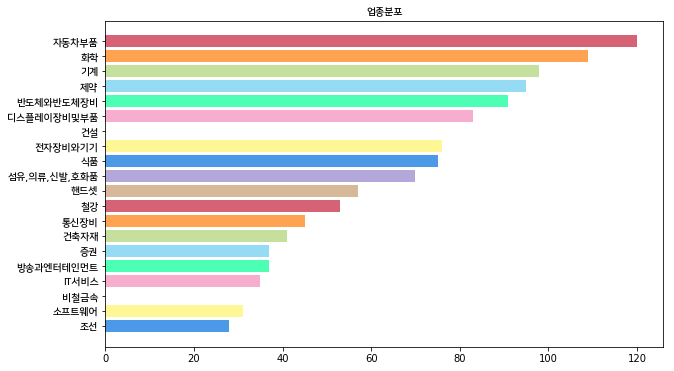

In [14]:
fontprop = fm.FontProperties(fname="./NanumSquareBold.ttf")
top20 = sector_counts[0:20]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title(u'업종분포', fontproperties=fontprop)
pos = arange(20)
pos = pos[::-1] # reverse pos list
plt.yticks(pos, [x.encode().decode() for x in top20.index], fontproperties=fontprop) 
plt.barh(pos, top20.values, align='center', color=colors_list, alpha=0.7)

In [16]:
df_semi = df[df['sector']=='소프트웨어'] 
df_semi.head(10)

,Unnamed: 0,rank,code,name,marcap,marcap_pct,year,sector
211,211,212,053800,안랩,0.617,0.05%,2013,소프트웨어
248,248,249,030520,한글과컴퓨터,0.469,0.04%,2013,소프트웨어
322,322,323,012510,더존비즈온,0.332,0.03%,2013,소프트웨어
455,455,456,053980,오상자이엘,0.205,0.02%,2013,소프트웨어
458,458,459,041020,인프라웨어,0.204,0.02%,2013,소프트웨어
476,476,477,136540,윈스테크넷,0.197,0.02%,2013,소프트웨어
492,492,493,085810,알티캐스트,0.190,0.01%,2013,소프트웨어
517,517,518,032190,다우데이타,0.179,0.01%,2013,소프트웨어
660,660,661,086960,MDS테크,0.128,0.01%,2013,소프트웨어
737,737,738,078000,텔코웨어,0.111,0.01%,2013,소프트웨어


In [75]:
ttable = df[['sector', 'marcap']]
#piv = pivot_table(ttable, values='marcap', rows=['sector'], aggfunc=np.sum)
piv = pd.pivot_table(ttable, index=['sector'], columns='marcap', aggfunc=np.sum) 

sector_marcap = piv.copy()
sector_marcap[:10]

sector


<Container object of 20 artists>

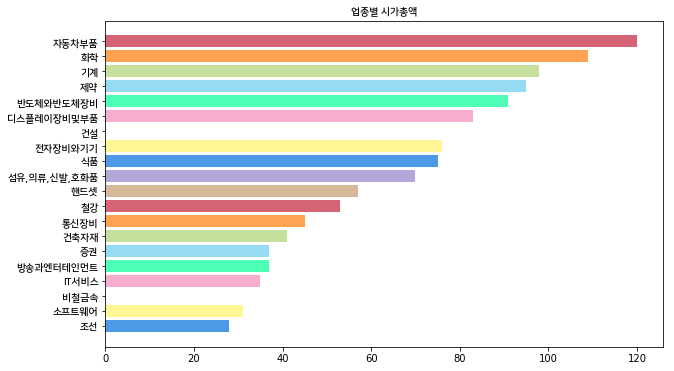

In [67]:
fontprop = fm.FontProperties(fname="./NanumSquareBold.ttf")
top20 = sector_counts[0:20]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title(u'업종별 시가총액', fontproperties=fontprop)
pos = arange(20)
pos = pos[::-1] # reverse pos list
plt.yticks(pos, [x.encode().decode() for x in top20.index], fontproperties=fontprop) 
plt.barh(pos, top20.values, align='center', color=colors_list, alpha=0.7)

In [68]:
print (sector_counts.index[:10]) 
print (sector_counts.values[:10])
print (sector_marcap.index[:10]) 
print (sector_marcap.values[:10])

Index(['자동차부품', '화학', '기계', '제약', '반도체와반도체장비', '디스플레이장비및부품', '건설', '전자장비와기기',
       '식품', '섬유,의류,신발,호화품'],
      dtype='object')
[120 109  98  95  91  83  80  76  75  70]
Index([], dtype='object', name='sector')
[]


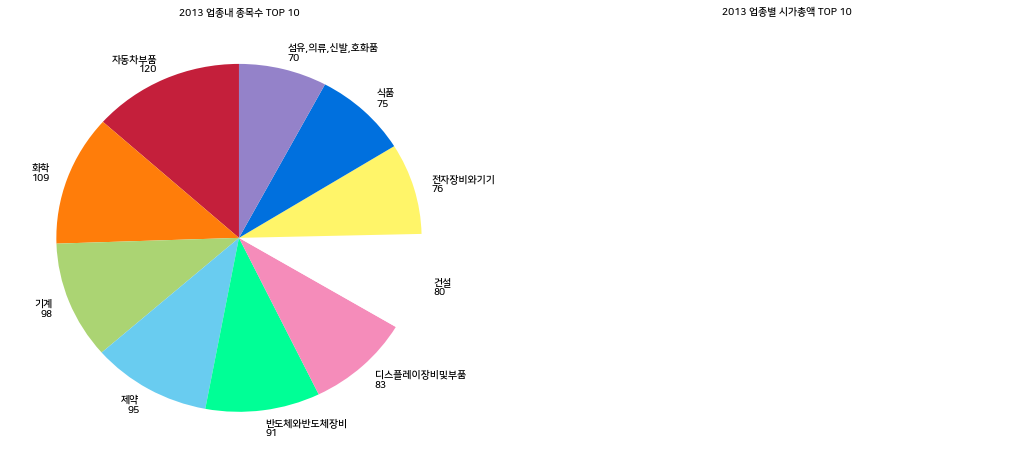

In [79]:
# 시가총액 비중 차트 (파이)
fontprop = fm.FontProperties(fname="./NanumSquareBold.ttf")
fig, axes = plt.subplots(nrows=1, ncols=2) 
fig.set_size_inches(18, 8)

#업종 내 종목 수
sec_stock_top = sector_counts[:10]
labels = sec_stock_top.index.astype(str) + '\n' + sec_stock_top.values.astype(str) 
ulabels = [x.encode().decode() for x in labels]

axes[0].set_title(u"2013 업종내 종목수 TOP 10", fontproperties=fontprop) 
patches, texts = axes[0].pie(sec_stock_top, labels=ulabels, startangle=90, 
                             colors=colors_list)
plt.setp(texts, fontproperties=fontprop)

sec_mar_top = sector_marcap[:10]
labels = sec_mar_top.index.astype(str) + '\n' + sec_mar_top.values.astype(str) 
ulabels = [x.encode().decode() for x in labels]

axes[1].set_title(u"2013 업종별 시가총액 TOP 10", fontproperties=fontprop) 
patches, texts = axes[1].pie(sec_mar_top, labels=ulabels, startangle=90, 
                             colors=colors_list)
plt.setp(texts, fontproperties=fontprop)